## Importing necessary libraries

In [62]:
import numpy as np #linear algebra library
import pandas as pd # data manipulation library
import matplotlib.pyplot as plt #plotting library
from statsmodels.tsa import stattools #time series analysis module
import seaborn as sns 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
init_notebook_mode(connected=True)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Reading in data

In [2]:
df1 = pd.read_csv('data/CMO_MSP_Mandi.csv')
df2 = pd.read_csv('data/Monthly_data_cmo.csv',index_col=0, parse_dates = [[2,3]], infer_datetime_format = True ) #columns Year and Month will be used for time series analysis.

In [5]:
df1.head() 

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [6]:
df2.head() 

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04-01,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


### Since data in df_monthly_cmo has a frequency of a month. Thus changing its sampling rate(Year_Month)

In [4]:
df2 = df2.to_period(freq='M') #Converting to period index with monthly frequency. 
type(df2.index)

pandas.core.indexes.period.PeriodIndex

## Exploring the DataFrame df1 , for MSP

### The dataset is of 155 instances and 5 columns

In [8]:
df1.shape # It contains 155 instances with 5 columns

(155, 5)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


### Missing data Report:
> msprice: contains 10 missing values <br>
> commodity,year,Type,msp_filter: contains 0 missing values

In [8]:
df1.describe(include = 'all')

,commodity,year,Type,msprice,msp_filter
count,155,155.000000,155,145.000000,155.0
unique,32,NaN,3,NaN,NaN
top,SESAMUM,NaN,Kharif Crops,NaN,NaN
freq,5,NaN,90,NaN,NaN
mean,NaN,2014.000000,NaN,2822.448276,1.0
std,NaN,1.418798,NaN,1441.725928,0.0
min,NaN,2012.000000,NaN,170.000000,1.0
25%,NaN,2013.000000,NaN,1470.000000,1.0
50%,NaN,2014.000000,NaN,2970.000000,1.0
75%,NaN,2015.000000,NaN,4000.000000,1.0


### Describe data Report:
> Commodity: 32 unique values <br>
> Type: 3 unique values <br>

In [11]:
df1['msp_filter'].unique()

array([1])

#### msp_filter has only unique value of 1, thus, we can drop this column since it doesn't provide us with any information or trend.

In [5]:
df1 = df1.drop('msp_filter', axis=1) #Dropping msp_filter

In [6]:
df1['year'].unique() # Five years are summarized in the dataset 2012, 2013, 2014, 2015 and 2016

array([2012, 2013, 2014, 2015, 2016])

### Summary CMO_MSP_Mandi.csv dataset. It contains four columns:(after removing msp_filter)
>  #### 1) commodity - contains 32 unique values, and gives different types of crops according to the seasons.
>  #### 2) year : data for five years from 2012 to 2016.
>  #### 3) Type : type of crop eg Kharif crop, Rabi crop or other crop.
>  #### 4) msp_price - minimum support price for a commodity, since we have yearly data for each crop,  we have 5 data points of msp for each commodity/crop.


## First remove any outliers and then impute the 10 missing values in the data.

In [123]:
import plotly.graph_objs as go
import plotly.plotly as py

y0 = df1['msprice'].values

data = [
    go.Box(
    y=y0,
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)]
py.iplot(data)

In [124]:
data = [go.Histogram(x=y0)]

py.iplot(data, filename='basic histogram')

#### The boxplot below suggests that there are no outliers in "msprice" vs "type of crop"

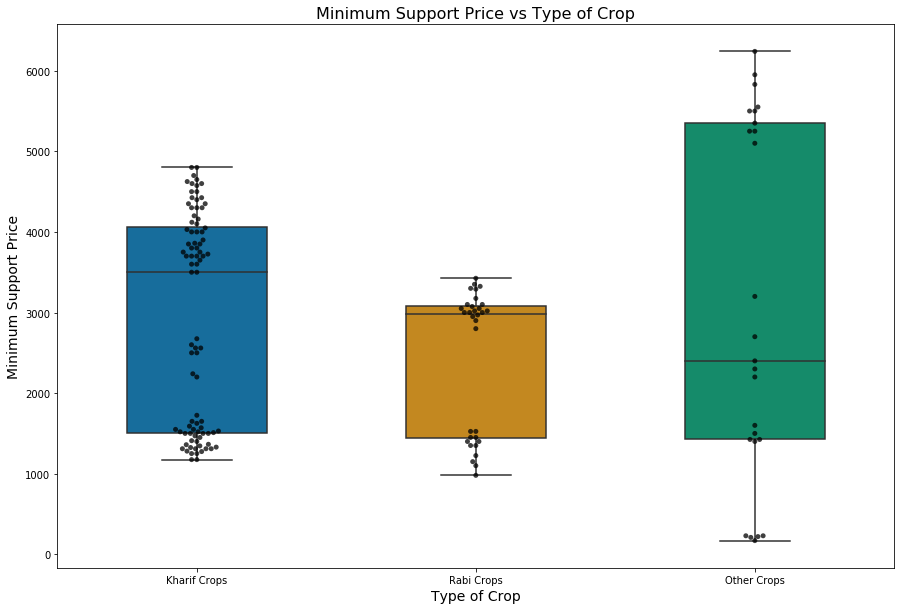

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))

# Make boxplot with seaborn
bplot = sns.boxplot(x="Type", y="msprice", data=df1, width = 0.5, palette = 'colorblind', whis =1.5, ax=ax) #For outlier detection
# add stripplot to boxplot with Seaborn
bplot = sns.swarmplot(y='msprice', x ='Type', data = df1, color='black', alpha = 0.75, ax=ax)

bplot.axes.set_title("Minimum Support Price vs Type of Crop",
                            fontsize=16)
 
bplot.set_xlabel("Type of Crop", 
                        fontsize=14)
 
bplot.set_ylabel("Minimum Support Price",
                        fontsize=14)
 
bplot.tick_params(labelsize=10)

### Bar plot

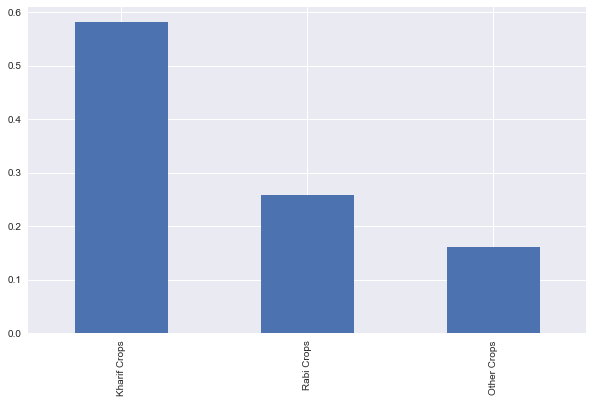

In [18]:
(df1['Type'].value_counts()/len(df1)).plot.bar() #More Kharif crops than Rabi crops?

### Few Points to be note from here:
> It isn't great idea to use boxplot for msprice to remove outliers, not that the distribution isn't normal , but since the prices of the same crop should be compared to itself
    > eg Sugarcane like given below: msprice for 2012 is 170, for 2013 its 210, for 2014 its 220,etc. If we have high priced crops such as copra which is worth 6240 in large numbers then in the distribution then understandably sugarcane would turn out to be the outliers, since their prices are very less. So, for outlier detection the prices of the same crop should be compared.


In [20]:
df1.sort_values(by='msprice', ascending=True).head() #Below, we can see the msprices of sugarcane

,commodity,year,Type,msprice
30,SUGAR-CANE,2012,Other Crops,170.0
61,SUGAR-CANE,2013,Other Crops,210.0
92,SUGAR-CANE,2014,Other Crops,220.0
154,SUGARCANE,2016,Other Crops,230.0
123,SUGAR-CANE,2015,Other Crops,230.0


In [21]:
df1.sort_values(by='msprice', ascending=False).head()  #msprice for copra which is a very high priced crop in terms
# of msp, compared to the others.

,commodity,year,Type,msprice
151,Copra (Ball)_Yellow,2016,Other Crops,6240.0
150,Copra (Milling)_Yellow,2016,Other Crops,5950.0
120,Copra (Ball)_Yellow,2015,Other Crops,5830.0
119,Copra (Milling)_Yellow,2015,Other Crops,5550.0
89,Copra (Ball)_Yellow,2014,Other Crops,5500.0


In [22]:
df1.info() #Mean values have been successfully imputed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
commodity    155 non-null object
year         155 non-null int64
Type         155 non-null object
msprice      145 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


In [23]:
df2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [24]:
df2.info() #No missing values in our dataframe.

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 62429 entries, 2015-04 to 2016-11
Freq: M
Data columns (total 9 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(4), object(5)
memory usage: 4.8+ MB


In [25]:
df2.shape # 62k rows with 9 columns.

(62429, 9)

### Points to ponder
> `As, we can see below min_price, max_price , modal_price all seem to have 0 as their minimum price ( unless that certain crop failed to arrive), so certainly we have outliers with great discrepancy. Maybe the data for that certain crop might not have been recorded at a certain mandi ( this could be a reason as such)`

In [7]:
df2.describe()

,arrivals_in_qtl,min_price,max_price,modal_price
count,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [27]:
from scipy.stats import zscore

In [28]:
pd.Series(zscore(df2['max_price'])).corr(pd.Series(zscore(df2['min_price'])))# Correlation Value isn't of much use.

0.11729048325781076

### For detection of outliers in Monthly_data_cmo.csv
#### Methods for outlier detection:
-   Density Based:
    -  DBSCAN
    -  LOF
-   Distance Based:
    -  K-NN
    -  K-Means
    -  Regression Hyperplane distance
-   Parametric:
    -  GMM
    -  Single class SVMs
    -  Extreme Value Theory

Other Statistical Tests (e.g, Z-score) variations of the above

`We certainly can't use parametric or Z-score values here for the same reason as the one I explained for df1, so I'm using linear regression based method below:`

In [8]:
df2['Commodity'] = df2['Commodity'].str.lower()

#### Removing rows where price : min, max or modal is equal to zero.

In [9]:
df2 = df2[(df2['min_price'] != 0) | (df2['max_price'] != 0) | (df2['modal_price'] != 0) ]

### Scatterplot of 'min_price' vs 'max_price' for df2

(0, 175000)

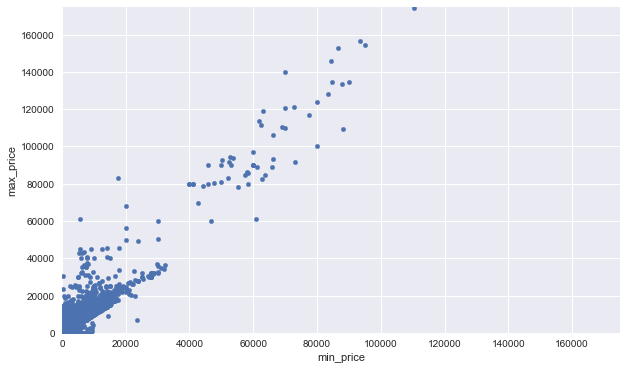

In [31]:
ax = df2.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax.set_xlim(0, 175000)
ax.set_ylim(0, 175000)

In [43]:
ax = df2.sort_values(by=['Commodity'])
corr = ax.corr(method='pearson')

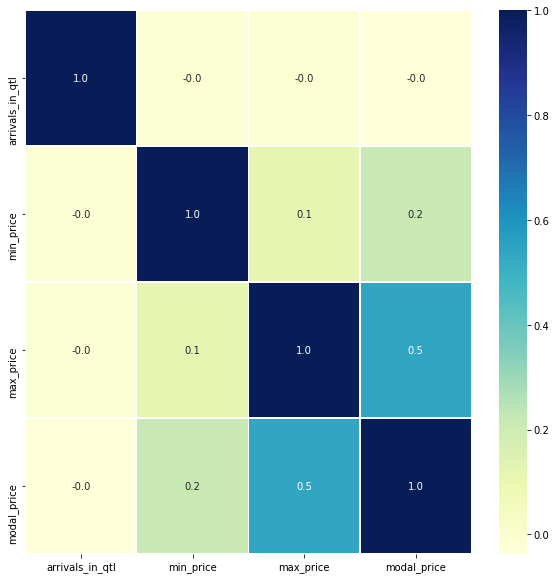

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt=".1f",cmap="YlGnBu",linewidths=.5, ax=ax)

### We can infer from here that:
    - There exists a positive correlation between min_price-max_price, min_price-modal_price
    - A string positive corrleation between modal_price and max_price

In [10]:
df2 = df2[(df2['min_price'] >= 0) & (df2['max_price'] >= 0) & (df2['modal_price'] >= 0 )]

In [11]:
df3 = df1.loc[df1['msprice'].isnull(), 'commodity'] #df3 gives the commodities with the missing values
dict = {}
for group, frame in df1[df1['commodity'].isin(df3.tolist())].groupby('commodity'):
    dict[group] = frame['msprice'].mean()
    
dict #Commodities with missing values with their means for the remaining years for mean value imputation.
for key, value in dict.items():
    df1.loc[(df1['commodity'] == key) & (df1['msprice'].isnull()), 'msprice']  = value

### Using Dbscan for outlier detection
__[](http://url)__

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [13]:
X = df1['msprice'].values.reshape(155, -1)

In [14]:
X.shape

(155, 1)

In [15]:
df1.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


### One-hot encoding for df1

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df1new = df1.copy()
df1new.loc[:,'year'] = le.fit_transform(df1.loc[:, 'year'])
df1new.loc[:, 'Type'] = le.fit_transform(df1.loc[:, 'Type'])
    
ohe = OneHotEncoder()
X = ohe.fit_transform(df1new[['year', 'Type']]).toarray()
b = df1new['msprice'].values.reshape(-1, 1)
X = np.concatenate((X, b), axis=1)

In [17]:
X.shape # Five columns for year one hot encoded, three columns for the crop type, and one for the price.

(155, 9)

In [18]:
# We must scale and standardize our data
X = StandardScaler().fit_transform(X)
# #############################################################################
# Compute DBSCAN
dbscan = DBSCAN(eps=3, min_samples= 4)
model = dbscan.fit(X)

labels = model.labels_

# identifying the core samples.
core_samples = np.zeros_like(labels, dtype = bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

### This removed the outliers in df1
df1new = df1[core_samples]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False  True False]
Estimated number of clusters: 15
Silhouette Coefficient:

In [19]:
df1.shape ### In total 9 outliers were removed.

(155, 4)

In [20]:
df1new.shape

(146, 4)

In [21]:
(1 - 146/155) * 100 # 5% instances were removed, thus there is no problem in filtering out.

5.8064516129032295

In [22]:
df1 = df1new

### Write df1 to file, since it has been outliers removed and imputed!

In [23]:
df1new.to_csv('CMO_MSP_Mandi_updated.csv') # Write file to disk

## Time Series Analysis

In [24]:
df2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,wheat(husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,wheat(husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,sorgum(jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [73]:
len(df2['min_price']) 

62429

In [74]:
df1.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


### Will go for autocorrelation for determining periodicity in the data i.e, repetitions.

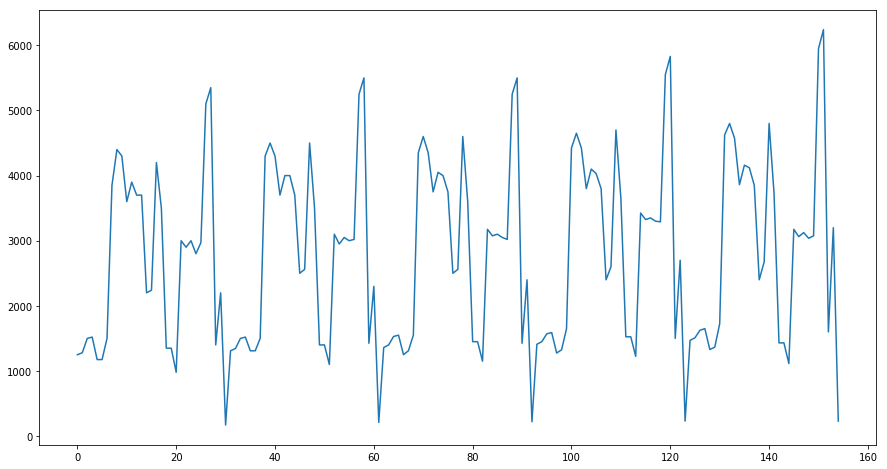

In [103]:
fig, ax1 = plt.subplots(figsize=(15,8))
plt.plot(df1['msprice'])

### Autocorrelation Function

### Log and difference trying to get near stationarity : Something that is constant in time, the mean is constant in time, the variance is constant in time.
Stationary time series has a constant mean, a constant variance and a constant autocorrelation.

In [54]:
"""log_air_passengers = np.log(df2['min_price'])
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()"""

"log_air_passengers = np.log(df2['min_price'])\nlog_air_passengers_diff = log_air_passengers - log_air_passengers.shift()\nlog_air_passengers_diff.plot()"

### Differencing can just help detrend and also by taking some moving average and subtract that moving average out.
  - To remove seasonality use a 'loess' method (locally weighted scatterplot smoothing).
  - If variance - usually the method is a power transformation or a log transformation.
  - These are all one to one monotonic transformation and can be reversed.

### Our data doesn't seem to have any trend. Stationary maybe?

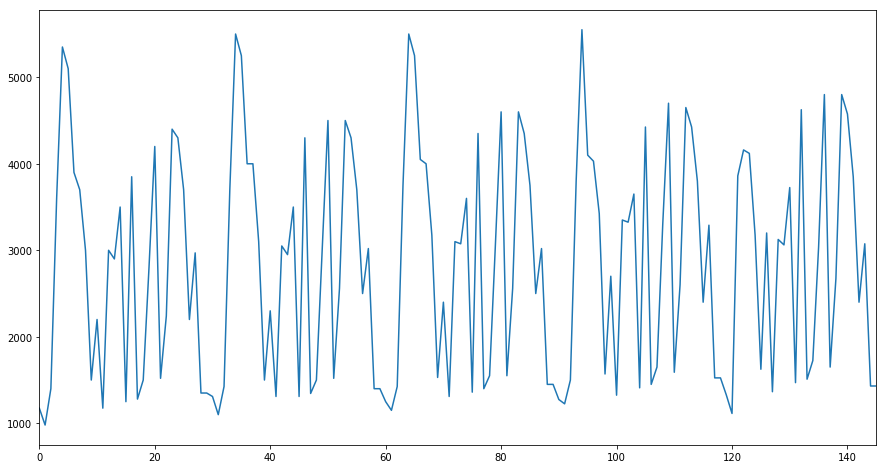

In [26]:
fig, ax1 = plt.subplots(figsize=(15,8))
df1.sort_values(['year', 'commodity']).reset_index()['msprice'].plot()
# of it its increasing just slightly year on year, thus, looks as if additive seasonality.

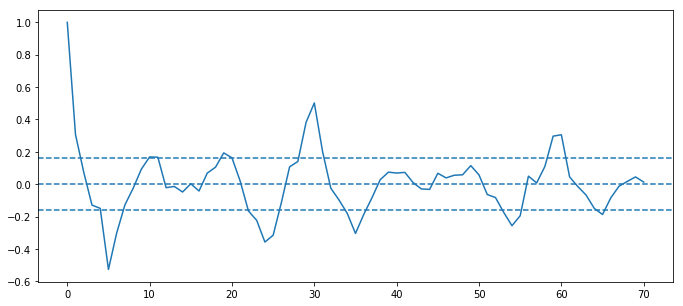

In [32]:
fig, ax1 = plt.subplots(figsize=(25,5))
acf_result = stattools.acf(df1.sort_values(['year', 'commodity']).reset_index()['msprice'], nlags=70 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df1['msprice'])), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df1['msprice'])), linestyle = '--')

#### In the above plot of autocorrelation, there is a massive spike at nearly 32, so that gives us internal structure, that the minimum support prices are highly correlated to each other, for each crop.
#### High self-correlation at 32, which can be inferred to each crop getting repeated after 32 by year and with its price(since 32 unique values)

In [57]:
df1.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


### Performing a dickey fuller test for df1
### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. Thus, we reject the null hypothesis and conclude that df1 is stationary.

In [33]:
stattools.adfuller(df1.sort_values(['year', 'commodity'])['msprice'])

(-6.614935619860216,
 6.241527859686468e-09,
 12,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007},
 2191.519361071064)

### Sorting index and trying to see correlation for min_price mean values, max_price mean value and modal_price mean value.

In [34]:
df2 = df2.sort_index()

In [35]:
df2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2014-09,Kurdwadi,sorgum(jawar),454,1353,2610,1981,2014-09,Solapur,Maharashtra
2014-09,Satara,ladies finger,128,2435,3261,2848,2014-09,Satara,Maharashtra
2014-09,Satara,potato,2988,2175,2488,2331,2014-09,Satara,Maharashtra
2014-09,Satara,ginger (fresh),199,3438,4813,4125,2014-09,Satara,Maharashtra
2014-09,Satara,ground nut pods (dry),1,3000,4000,3500,2014-09,Satara,Maharashtra


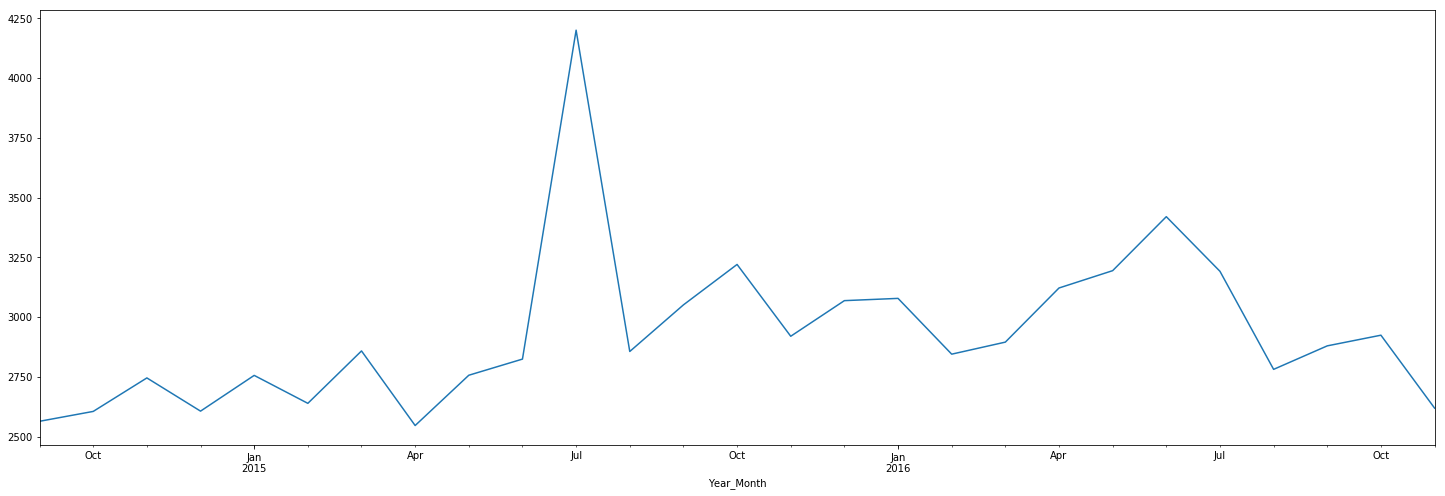

In [38]:
fig, ax1 = plt.subplots(figsize=(25,8))
df2['min_price'].groupby(level = 0).mean().plot()

###  Looking below it looks like for a lag of 1 there is repetition, since I'm taking all the crops price average values for months. Thus, monthly correlation can be there.

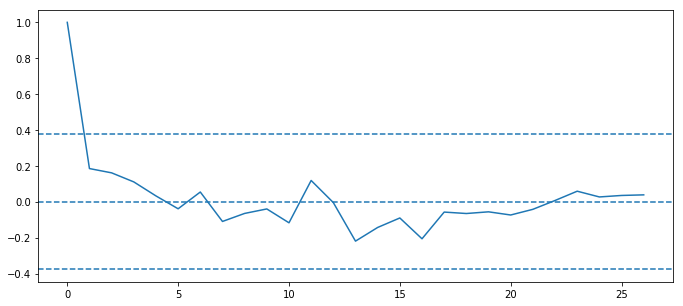

In [39]:
fig, ax1 = plt.subplots(figsize=(25,5))
acf_result = stattools.acf(df2['min_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['min_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['min_price'].groupby(level = 0).mean())), linestyle = '--')

### Detrending the given data by differencing

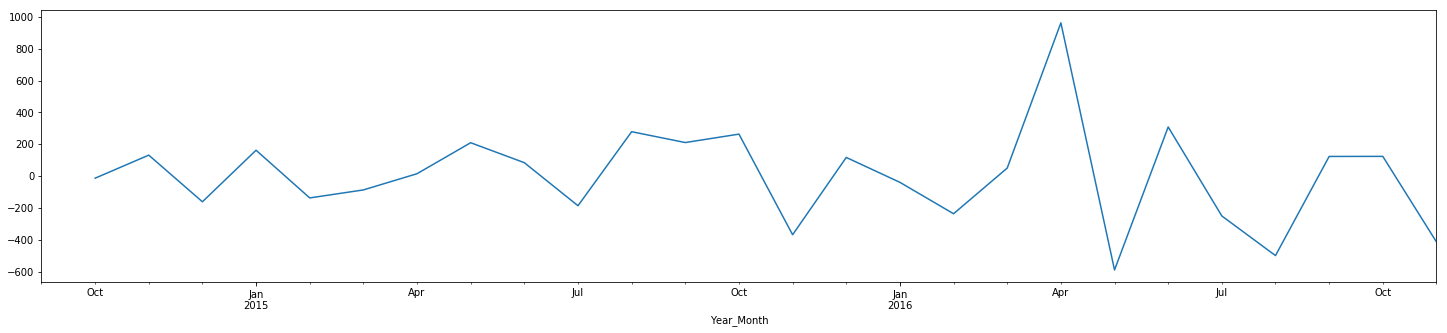

In [41]:
fig, ax1 = plt.subplots(figsize=(25,5))
(df2['max_price'].groupby(level = 0).mean() - df2['max_price'].groupby(level = 0).mean().shift()).plot()

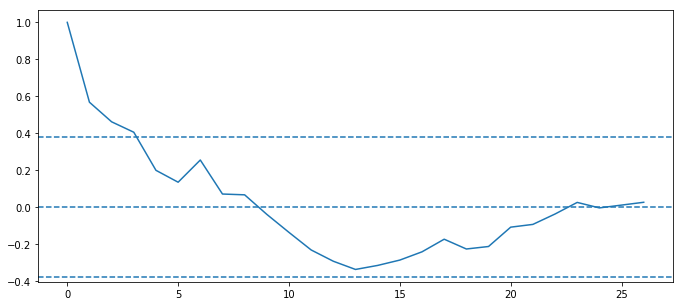

In [42]:
fig, ax1 = plt.subplots(figsize=(25,5))
acf_result = stattools.acf(df2['max_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['max_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['max_price'].groupby(level = 0).mean())), linestyle = '--')

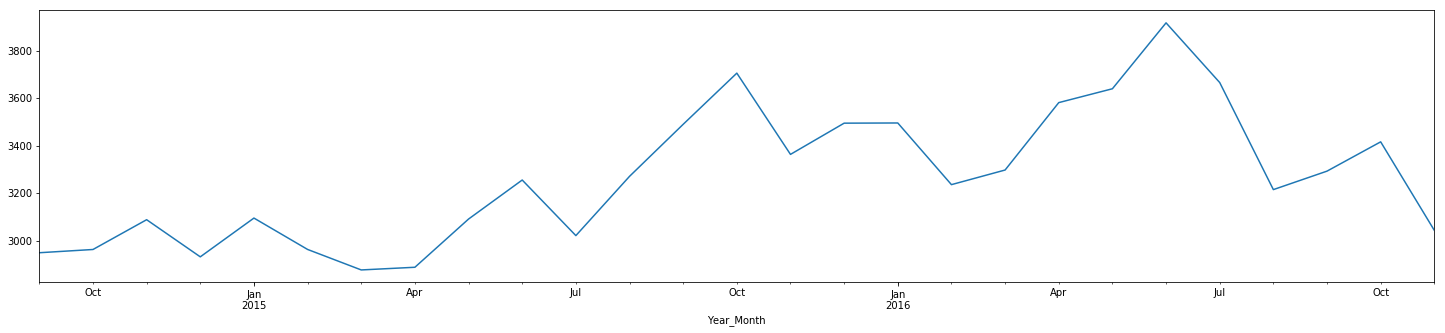

In [43]:
fig, ax1 = plt.subplots(figsize=(25,5))
df2['modal_price'].groupby(level = 0).mean().plot()

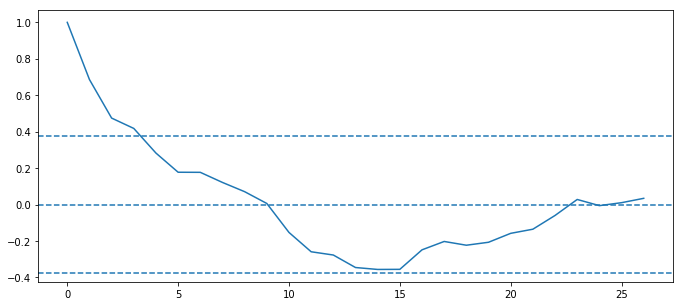

In [44]:
fig, ax1 = plt.subplots(figsize=(25,5))
acf_result = stattools.acf(df2['modal_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['modal_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['modal_price'].groupby(level = 0).mean())), linestyle = '--')

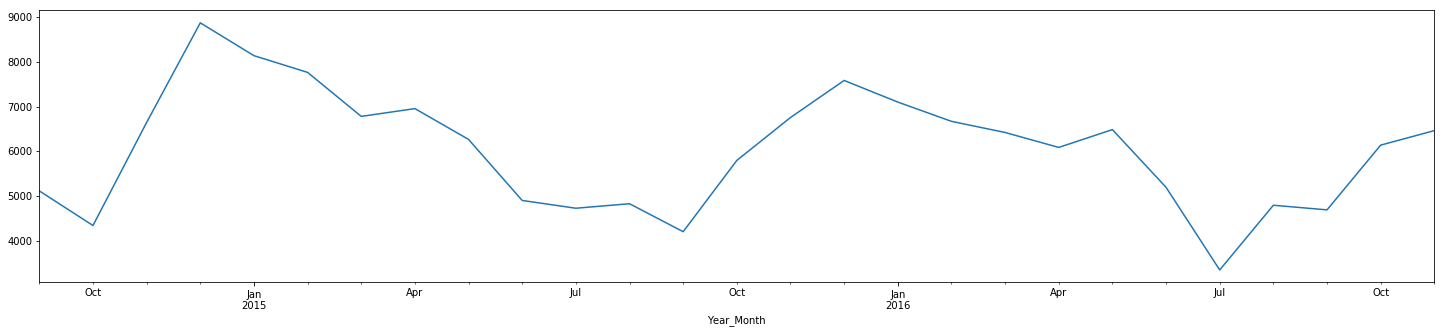

In [45]:
fig, ax1 = plt.subplots(figsize=(25,5))
df2['arrivals_in_qtl'].groupby(level = 0).mean().plot()

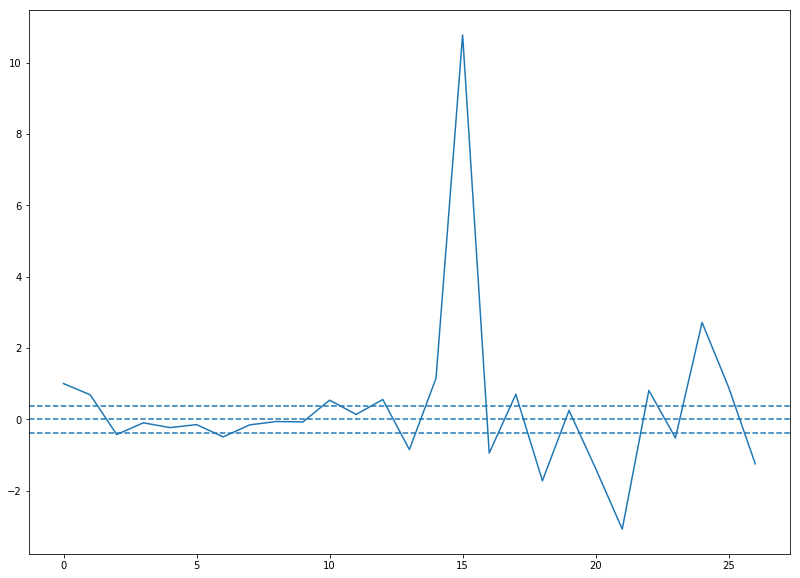

In [48]:
fig, ax1 = plt.subplots(figsize=(30,10))
acf_result = stattools.pacf(df2['arrivals_in_qtl'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['arrivals_in_qtl'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['arrivals_in_qtl'].groupby(level = 0).mean())), linestyle = '--')

### How to remove seasonality/de-seasonalize
- -  Simplest: Average de-trended values for specific season
- -  More Common: use 'loess' method (locally weighted scatterplot smoothing)
    -  Window of specified width is placed over the data
    -  A weighted regression line or curve is fitted to the data, with points closest to the center of the curve having greatest weight.
    -  Weighting is reduced for points further away from regression line/curve and calculation is rerun several times.
    -  This yield one point on loess curve
    -  Helps reduce impact of outlier points.
    -  Computationally taxing

### Detrended max_price

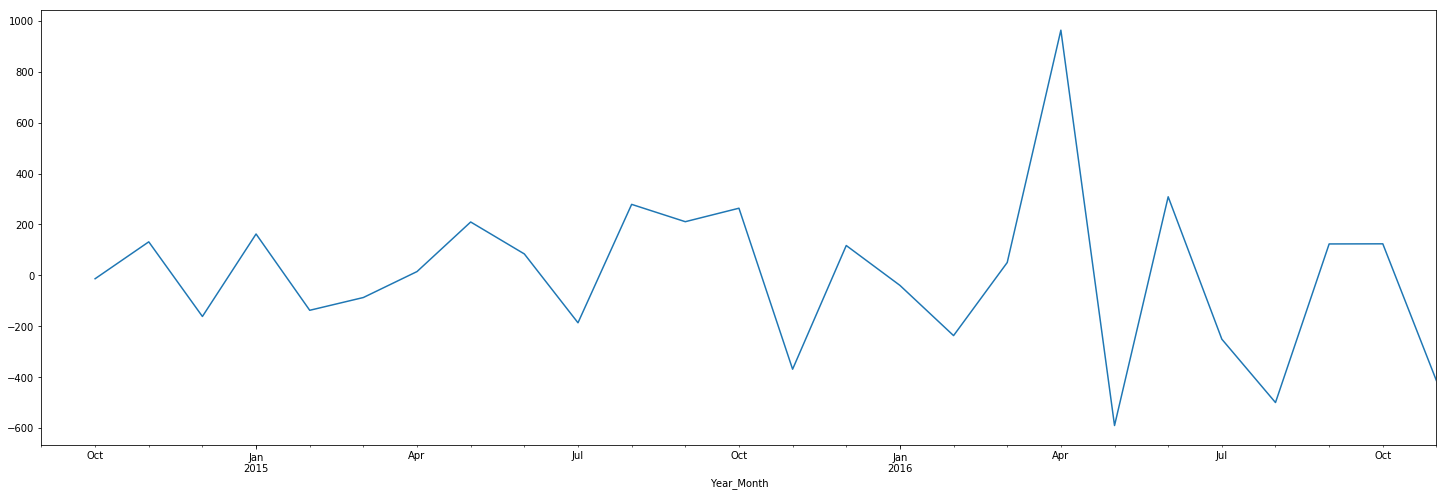

In [50]:
fig, ax1 = plt.subplots(figsize=(25,8))
(df2['max_price'].groupby(level = 0).mean() - df2['max_price'].groupby(level = 0).mean().shift()).plot()

### Rolling Windows and Expanding Windows

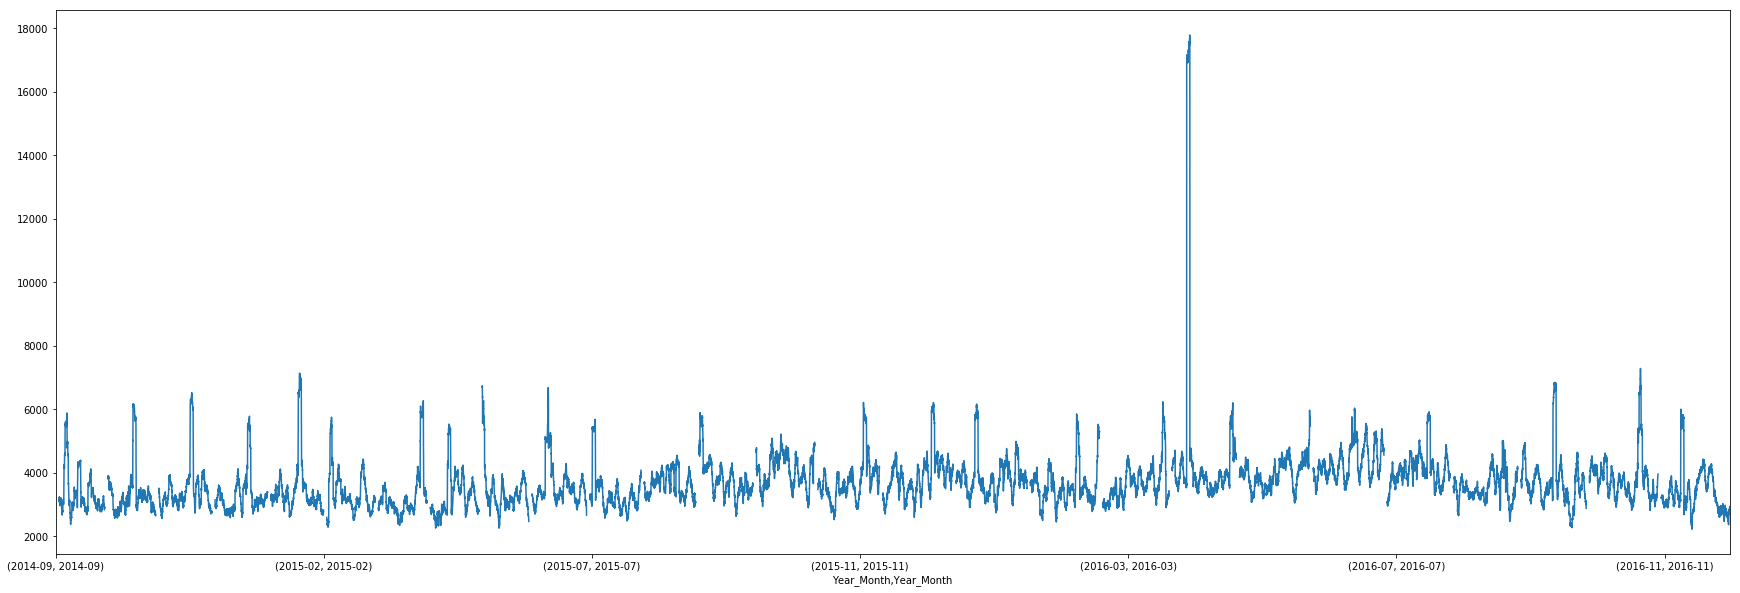

In [52]:
fig, ax1 = plt.subplots(figsize=(30,10))
r = df2['max_price'].groupby(level = 0).rolling(window=120)
r.mean().plot()

In [65]:
from datetime import date, datetime

def json_serial(obj):
    """JSON serializer for objects not serializable by default json code"""

    #if isinstance(obj, (datetime, date)):
    return obj.isoformat()

In [68]:
dt = df2.index.copy()

In [74]:
dt1=dt.to_timestamp()

In [75]:
type(dt1)

pandas.core.indexes.datetimes.DatetimeIndex

In [60]:
df2.columns

Index(['APMC', 'Commodity', 'arrivals_in_qtl', 'min_price', 'max_price',
       'modal_price', 'date', 'district_name', 'state_name'],
      dtype='object')

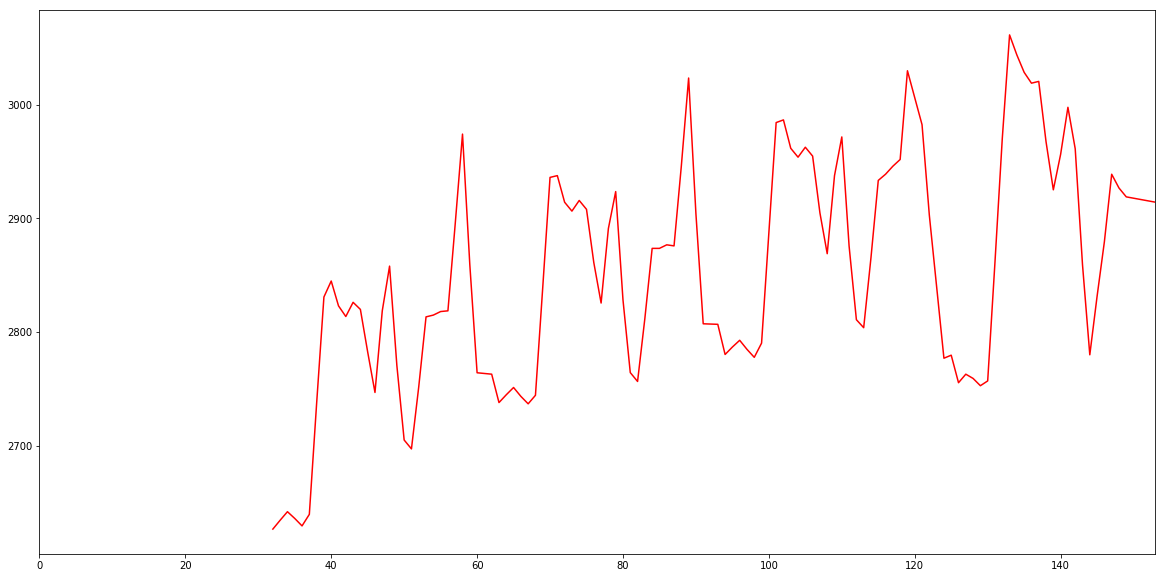

In [79]:
fig, ax1 = plt.subplots(figsize=(20,10))
r = df1.rolling(window = 32)
r['msprice'].mean().plot(color='red')

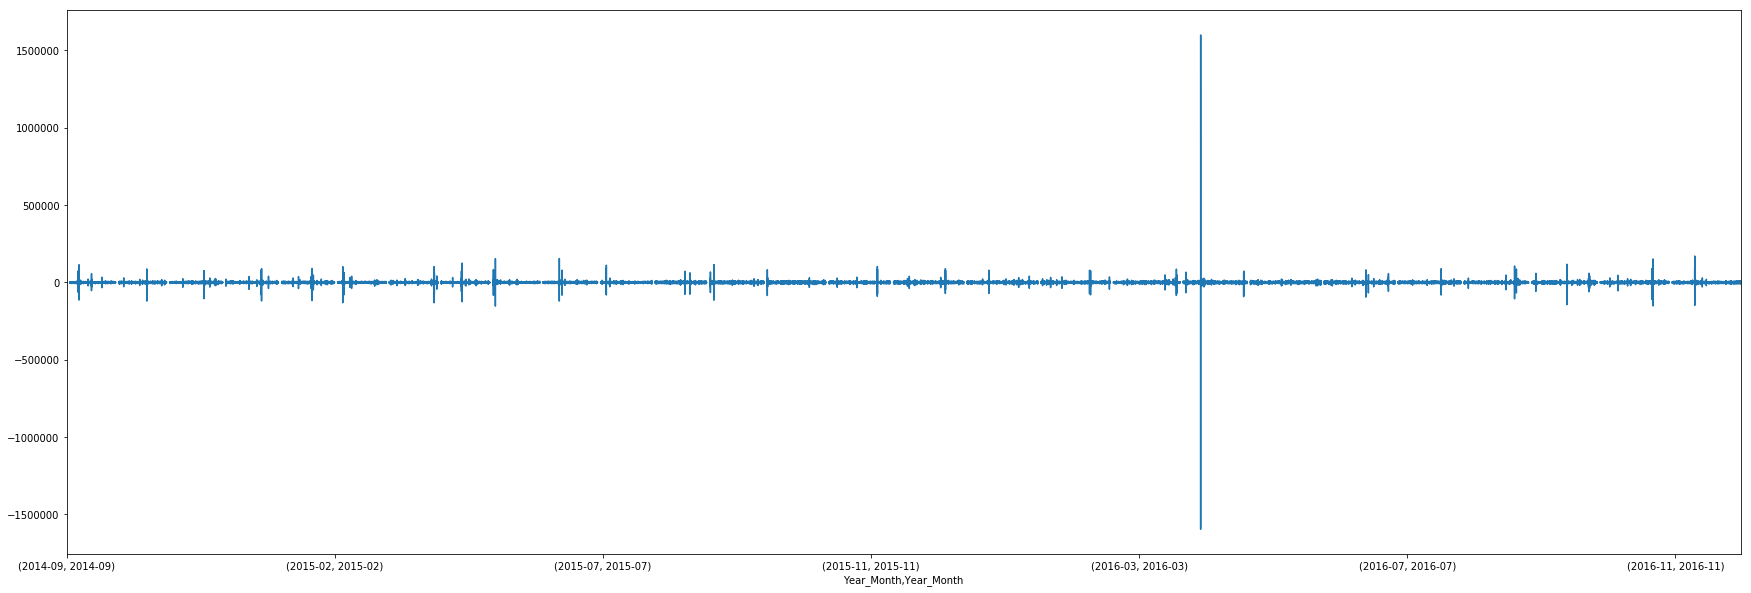

In [84]:
fig, ax1 = plt.subplots(figsize=(30,10))
r = df2['max_price'].groupby(level = 0).rolling(window=120).apply(lambda x : x[1] - x[2])
r.plot()

### Just checking expanding windows

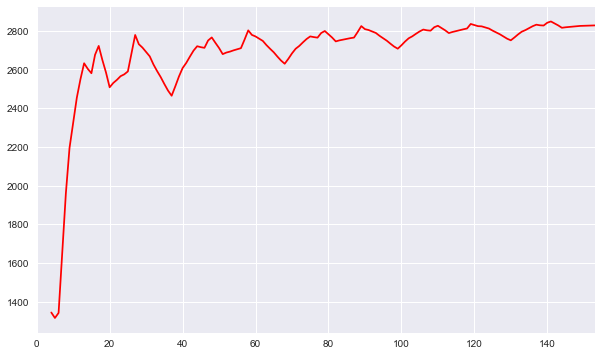

In [74]:
df1.expanding(min_periods= 5)['msprice'].mean().plot(color = 'red')

### Graph for max_price

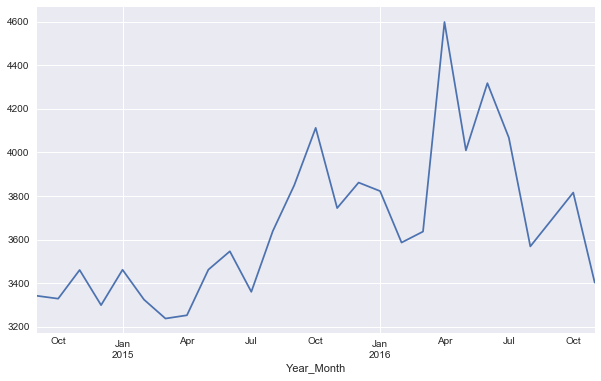

In [75]:
df2['max_price'].groupby(level = 0).mean().plot()

### Close to a linear Trend in max_prices year by year as can be seen below after resampling!!! Resampling removes the fluctuations as seen above.

Year_Month
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

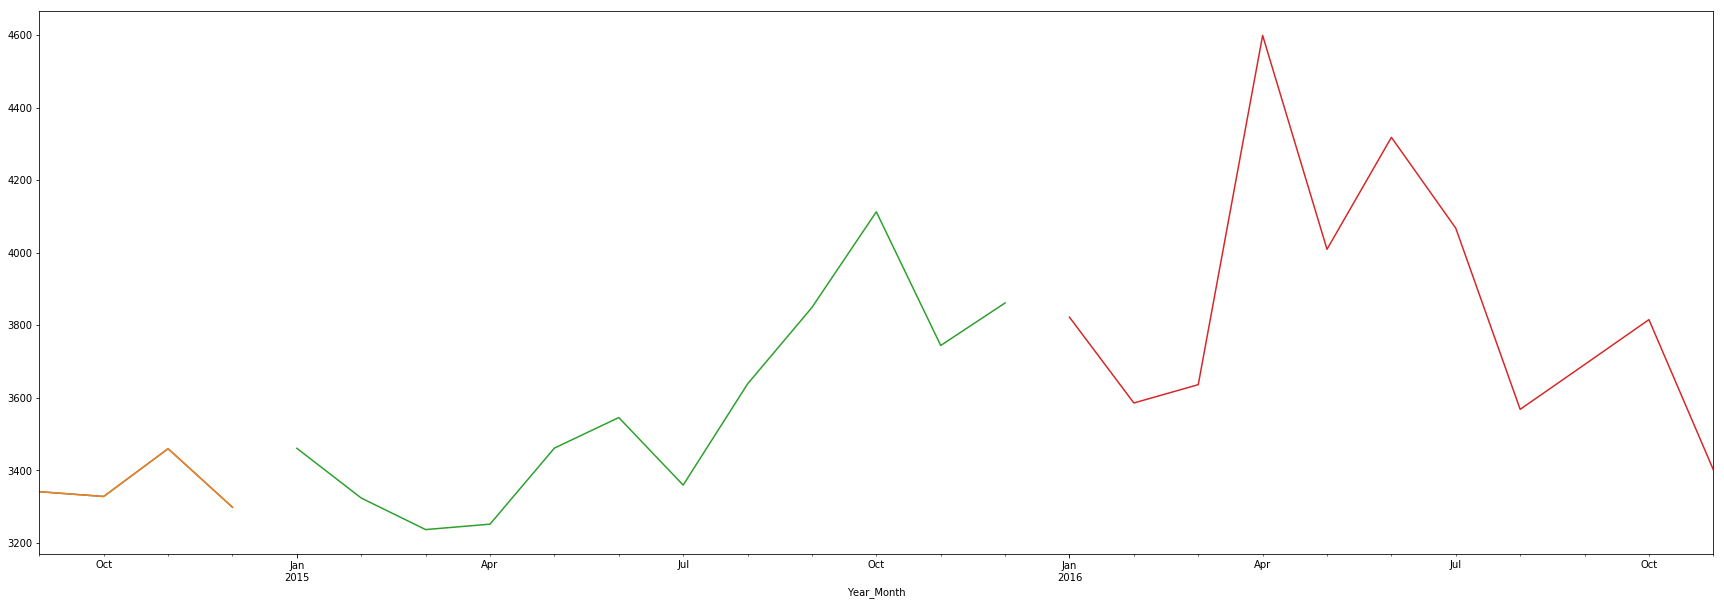

In [85]:
fig, ax1 = plt.subplots(figsize=(30,10))
df2['max_price'].groupby(level = 0).mean().resample('A').plot()

### Close to a linear trend for df1 too!

In [86]:
df1 = df1.set_index('year')
df1.index = pd.to_datetime(df1.index, format='%Y').to_period('A')

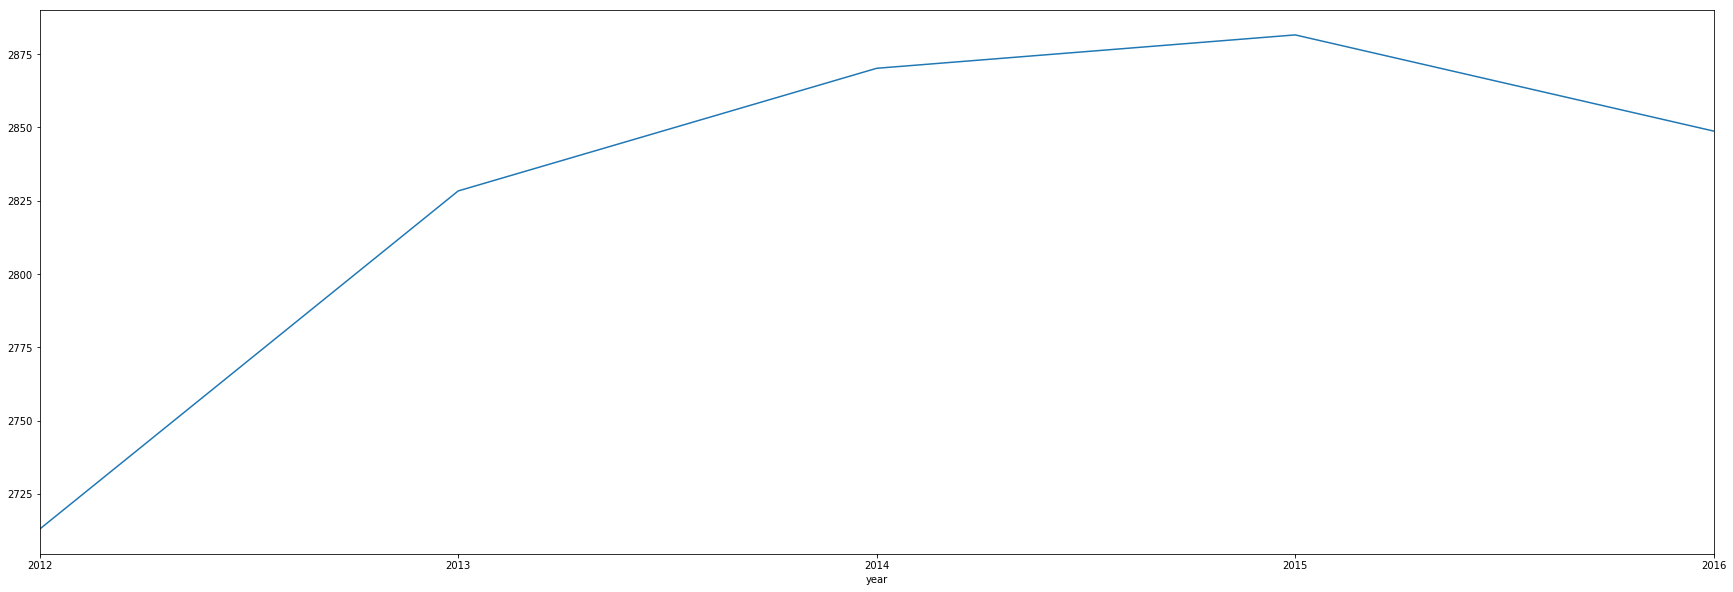

In [88]:
fig, ax1 = plt.subplots(figsize=(30,10))
df1.groupby(level= 0)['msprice'].mean().plot()

### Examining the Seasonal Trend in the data

In [89]:
df3 = pd.DataFrame(df2.groupby(level = 0)['max_price'].agg('median'))

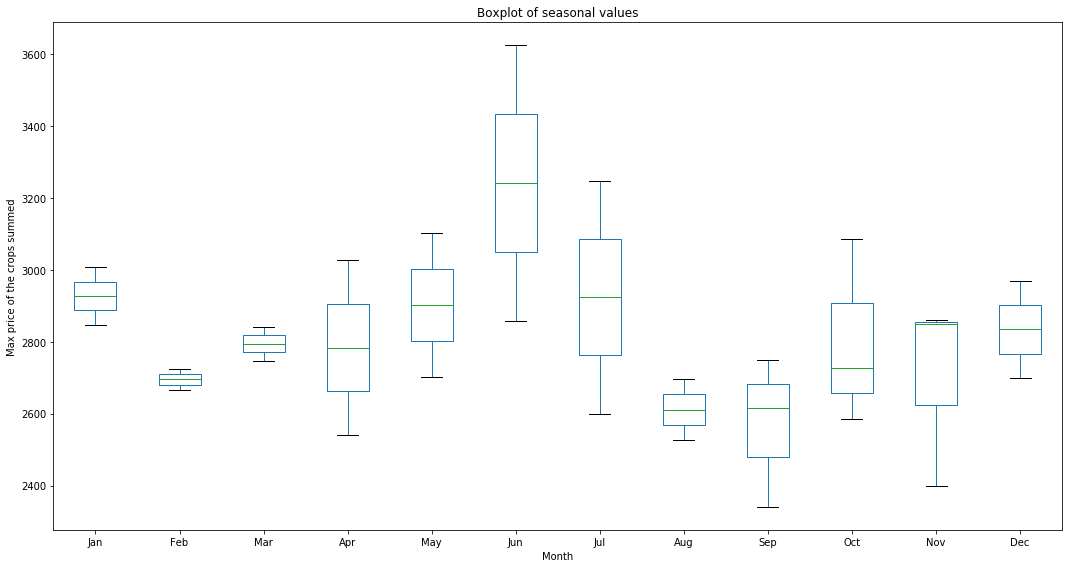

In [94]:
df3['Month'] = df3.index.strftime('%b')
df3['Year'] = df3.index.year

df3_piv = df3.pivot(index= 'Year', columns = 'Month', values = 'max_price')

# put the months in order
month_names = pd.date_range(start='2016-01-01', periods=12, freq='MS').strftime('%b')
df3_piv = df3_piv.reindex(columns=month_names)

# plot it
fig, ax = plt.subplots(figsize=(15, 8))
df3_piv.plot(ax=ax, kind='box');

ax.set_xlabel('Month');
ax.set_ylabel('Max price of the crops summed');
ax.set_title('Boxplot of seasonal values');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

` As can be seen the prices of the  crops seem the median price of the crops seems to be high for Jun` 

In [95]:
df3_piv 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617.0,2586.5,2850.0,2700.0
2015,2847.0,2724.0,2748.0,2541.0,2703.0,2859.0,2600.0,2697.5,2750.0,3087.5,2862.0,2970.0
2016,3008.0,2667.0,2842.0,3027.0,3102.0,3625.0,3248.0,2525.5,2341.0,2726.0,2400.0,NaN


In [96]:
df3 = df2.groupby(level = 0)[['max_price', 'min_price', 'modal_price']].agg('mean')
df3.index = df3.index.to_timestamp()

### Trends , Seasonality, Residual and Observed

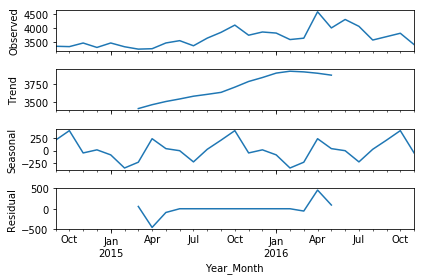

In [100]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df3['max_price'])
resplot = res.plot()

#### For max_price

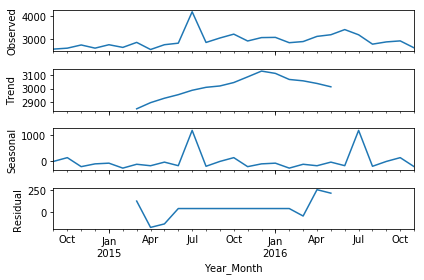

In [101]:
res = sm.tsa.seasonal_decompose(df3['min_price'])
resplot = res.plot()

#### For min_price

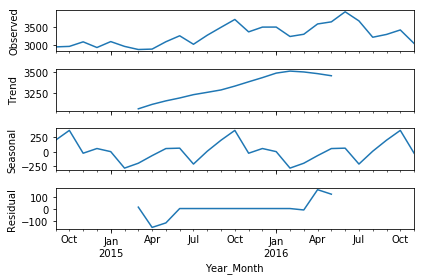

In [102]:
res = sm.tsa.seasonal_decompose(df3['modal_price'])
resplot = res.plot()

### Detect seasonality type (multiplicative or additive) for each cluster of APMC and commodities

`Commodities needed to be changed to lower case since there is padded-wheat(unhusked) in capital as well as lower case`

In [103]:
df2['Commodity'] = df2['Commodity'].str.lower()

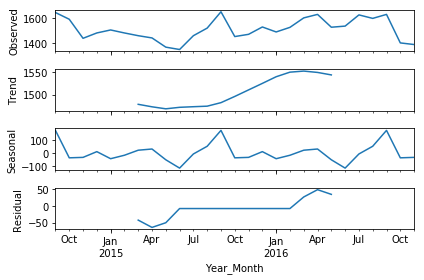

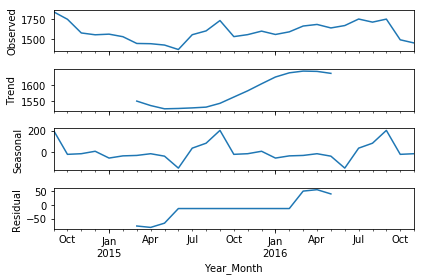

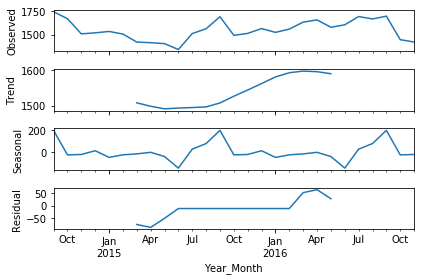

In [104]:
for group, frame in df2.reset_index().groupby('APMC'):
    frame.index = frame['Year_Month']
    frame.index = frame.index.to_timestamp()

    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['min_price'].agg('mean'))
    resplot = res.plot()
    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['max_price'].agg('mean'))
    resplot = res.plot()
    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['modal_price'].agg('mean'))
    resplot = res.plot()
    break

### Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonlized
`There maybe a way to do this using time series, but I didn't find any`

In [105]:
dict = {}
df1['commodity'] = df1['commodity'].str.lower() # Working with text data, lower() method on str object
for group, frame in df1.groupby('commodity'):
    dict[group] = frame['msprice'].mean()

In [106]:
dict

{'bajri': 1268.0,
 'barli': 1113.75,
 'coconut': 1437.5,
 'copra (ball)_yellow': 5450.0,
 'copra (milling)_yellow': 5287.5,
 'cotton': 3742.0,
 'cotton_long staple': 4042.0,
 'gr.nut kernels': 3970.0,
 'gram_yellow': 3175.0,
 'jowar_hybrid': 1545.0,
 'jute_yellow': 2560.0,
 'maize': 1297.0,
 'masur_yellow': 3062.5,
 'mustard': 3125.0,
 'niger-seed': 3595.0,
 'paddy-unhusked': 1360.0,
 'pigeon pea (tur)': 4310.0,
 'ragi_maldandi': 1585.0,
 'rice(paddy-hus)': 1397.0,
 'safflower': 3037.5,
 'sesamum': 4560.0,
 'sorgum(jawar)': 1566.0,
 'soyabean': 2527.0,
 'soyabean_black': 2400.0,
 'spilt gerrn gram': 4590.0,
 'split black gram': 4390.0,
 'sunflower': 3760.0,
 'toria_yellow': 3075.0,
 'wheat(husked)': 1431.25,
 'wheat(unhusked)': 1431.25}

In [107]:
for group, frame in df2.groupby('APMC'):
    print(frame.loc[frame['Commodity'].isin(list(dict.keys())), ['Commodity','min_price']])
    break

                 Commodity  min_price
Year_Month                           
2014-09     paddy-unhusked       1645
2014-10     paddy-unhusked       1591
2014-11     paddy-unhusked       1438
2014-12     paddy-unhusked       1481
2015-01     paddy-unhusked       1505
2015-02     paddy-unhusked       1481
2015-03     paddy-unhusked       1459
2015-04     paddy-unhusked       1441
2015-05     paddy-unhusked       1367
2015-06     paddy-unhusked       1348
2015-07     paddy-unhusked       1459
2015-08     paddy-unhusked       1520
2015-09     paddy-unhusked       1651
2015-10     paddy-unhusked       1452
2015-11     paddy-unhusked       1470
2015-12     paddy-unhusked       1529
2016-01     paddy-unhusked       1489
2016-02     paddy-unhusked       1526
2016-03     paddy-unhusked       1602
2016-04     paddy-unhusked       1630
2016-05     paddy-unhusked       1527
2016-06     paddy-unhusked       1536
2016-07     paddy-unhusked       1626
2016-08     paddy-unhusked       1598
2016-09     

### Added MSPrice from df1 to df2 for comparison

In [108]:
df2['msp_price'] = df2['Commodity'].apply(lambda x : dict[x] if x in list(dict.keys()) else np.nan)

In [109]:
dict['bajri']

1268.0

In [110]:
if 'bajri' in ['bajri']:
    print('bajri')

bajri


### Graph of msprice ,max_price, min_price and modal_price , here first thing we observe is the spike in and around July in min_price!

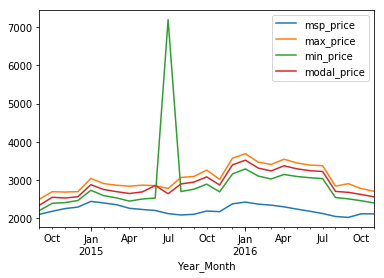

In [112]:
df2.dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').plot()

### If I take an rolling window of 3 months time then I can deseasonlize the max_price, min_price , modal_price by taking the average values and also by removing the trend

###  Below gives a graph for comparison of msp_price and deseasonalized price for max_price ,etc.

### This one is without the shift

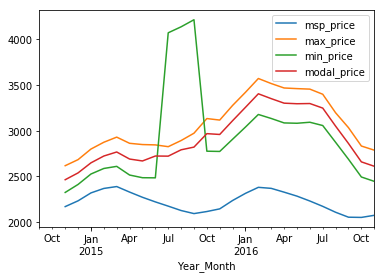

In [113]:
ax = df2.dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').rolling(window = 3).agg('mean').plot()

### After shifting and differencing , we get the deseasonalized plot

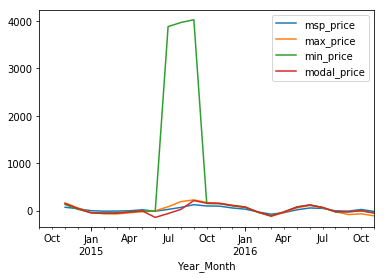

In [114]:
ax = (df2[['max_price', 'min_price', 'modal_price', 'msp_price']] - df2[['max_price', 'min_price', 'modal_price', 'msp_price']].shift()).dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').rolling(window = 3).agg('mean').plot()

### Flag set of APMC/mandis and commodities with highest price fluctuation across different commodities in each relevant season, and year.

#### At the moment I don't know how it should be done, but if I had to do it now, then I would have to plot the graphs for each of the APMC and its commodities and see the individual fluctuations, which is not feasible.

### For flagging set of APMC and commodities we can use moving average! Rolling window, which will give the mean for k number of values , where k is the window size. I am selecting window size below 25 percentile, so as to be able to show the fluctuations in even small mandis with lesser crops and months of sale

In [115]:
df2.groupby('APMC')['max_price'].agg(['count', 'mean']).describe() # Will take k - below 36 which is the 25th percentile

,count,mean
count,349.000000,349.000000
mean,178.879656,3827.137521
std,226.546784,2425.335745
min,1.000000,309.132075
25%,36.000000,2815.263158
50%,116.000000,3610.172043
75%,216.000000,4394.803571
max,1538.000000,28704.000000


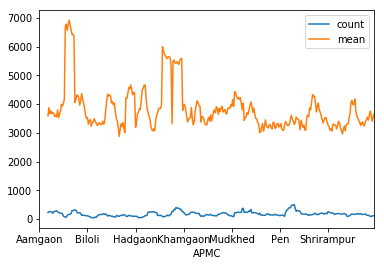

In [116]:
df2.groupby('APMC')['max_price'].agg(['count', 'mean']).rolling(window = 10).agg('mean').plot()

The orange curve above helps us to identify which APMCs have fluctuations in prices,as we can see APMC such as Pen, Mudhkhed ,etc doesn't have too much fluctuations in prices, but APMCs like Khamgaon, Hadgaon, Bioli have great fluctuations from mean of 4000 they even reach 6000, etc. for crops

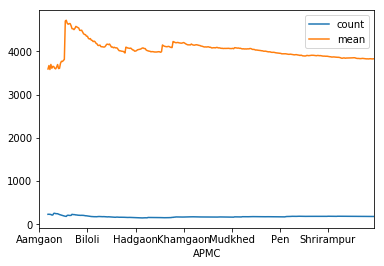

In [118]:
df2.groupby('APMC')['max_price'].agg(['count', 'mean']).expanding(min_periods = 10).agg('mean').plot()

###  Expanding window (above) wouldn't be able to detect fluctuations easily after some time since the periods as above would keep on increasing from 10, and any anamolous values wouldn't affect the mean by a very high deviation after a long time

### For commodities : window size of  5, below 25%

In [119]:
df2.groupby('Commodity')['max_price'].agg('count').describe()

count     204.000000
mean      306.024510
std       686.645286
min         1.000000
25%        12.750000
50%        59.500000
75%       248.500000
max      4115.000000
Name: max_price, dtype: float64

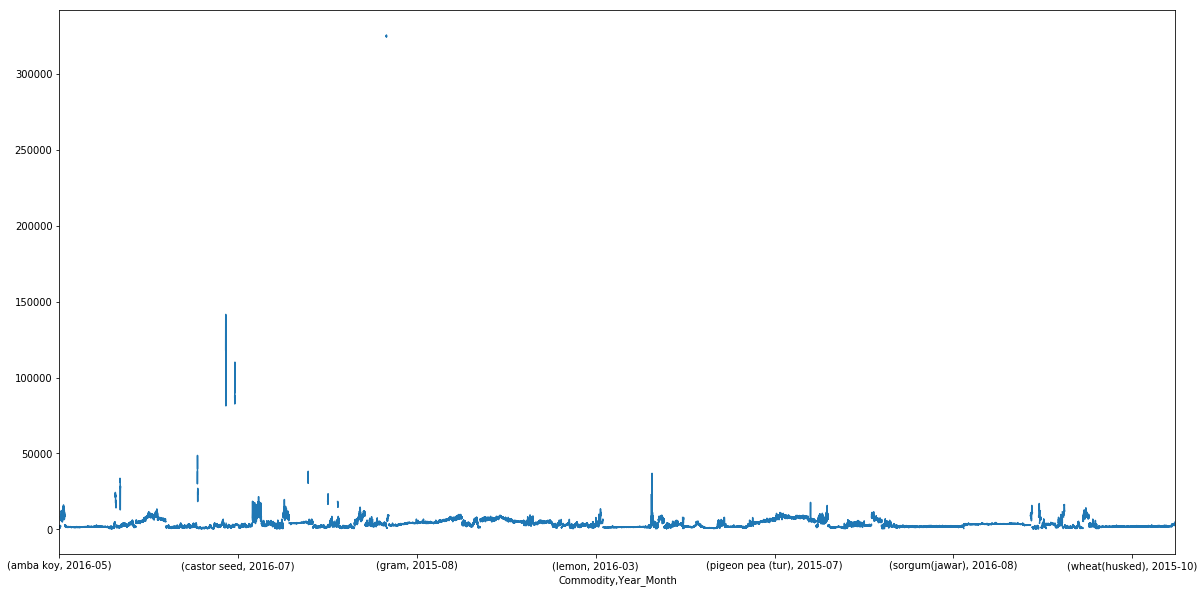

In [122]:
fig, ax1 = plt.subplots(figsize=(20,10))
df2.groupby('Commodity')['max_price'].rolling(window = 5).agg('mean').plot()

### The above graph although not very intuitive but it should be able to help us in finding fluctuation in prices of commodities.